## Basic preprocessing

In [1]:
from PyPerMANOVA import permutational_analysis

import sklearn.datasets
import seaborn as sns
import pandas as pd

def make_groups(n_clusters = 3,
                d_differences = [2,-2],
                n_features = 4,
                samples_per_cluster = 20,
                random_state = 42,
                draw=True,
                **kwargs
                ):

    first_center = tuple(0 for i in range(n_features))
    centers = [first_center] + [tuple(x+d for x in first_center) for d in d_differences]
    centers = centers[:n_clusters] 
    
    raw_data = sklearn.datasets.make_blobs(n_samples=samples_per_cluster*n_clusters,
                                           n_features=n_features,
                                           centers=centers,
                                           random_state = random_state,
                                           **kwargs
                                           )
    
    raw_df = pd.DataFrame(data  = raw_data[0],
                          index = raw_data[1],
                          columns = [f"feature_{i+1}" for i in range(raw_data[0].shape[1])])
    raw_df.index = raw_df.index.astype(str)
    if draw:
        #draw dataframe
        sns.scatterplot(data=raw_df,x="feature_1",y="feature_2",hue=raw_df.index)
        
    return(raw_df)

## Basics of PyPerMANOVA for every dataset

The basic function from PyPerMANOVA is `permutational_analysis`.
It takes the following arguments:
 - `data` - a numerical pandas DataFrame
 - `mapping` - object of various types, used to partition data into groups
 - `column` - when `mapping` is a DataFrame, the column containing the groups
 - `by` - what orientation is used to produce the distance matrix, or what axis contains groups
 - `norm` - normalize the data by which axis - row, column, or not at all (pass `norm = None` for latter case)
 - `metric` - what metric is used to quantify distance, by default it's "euclidean"
 - `permutations` - the number of permutations used to calculate P-Value
It outputs the following variables:
 - `permanova_result` - result of PerMANOVA in the form of a DataFrame
 - `posthoc_result` - result of post-hoc analysis in the form of a DataFrame
 
## Example on the dummy data

Using the above defined `make_groups` function, we'll simulate three datasets:

- One where every group is distinct
- One where one group is distinct
- One where no group is distinct

Total number of groups will be 3, each having 20 samples, and the distance from the first group
will be controlled by `d_differences` parameter.

Our simulated data contains label information in the indices, 
so we must pass `mapping = None` and `by = "row"`. We can normalize
along the columns by passing `norm = "column"` or not normalize at all by `norm=None`.
 
### Example on data when every group is different

,Pval,eta-sqr,F
0,0.001,0.734344,78.781609


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,0,0.001,0.003,0.566468,2.289498,49.652214,7.046433,37.889413904231375
1,1,2,0.001,0.003,0.804383,4.079443,156.257343,12.500294,37.55768287551912
2,0,2,0.001,0.003,0.450713,1.814396,31.180608,5.583960,37.88614852262987


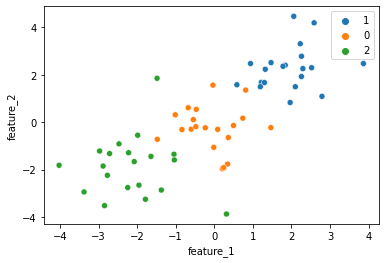

In [2]:
sample_data_alldifferent = make_groups()
perm_res,post_res = permutational_analysis(data = sample_data_alldifferent,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

In [5]:
type(sample_data_alldifferent)
sample_data_alldifferent

,feature_1,feature_2,feature_3,feature_4
1,1.216747,1.677938,2.813517,0.769136
0,0.738467,0.171368,-0.115648,-0.301104
2,0.314659,-3.867265,-1.313740,-3.612716
2,-3.377669,-2.937825,-1.484965,-1.486214
0,0.343618,-1.763040,0.324084,-0.385082
0,-0.600639,-0.291694,-0.601707,1.852278
0,-0.234153,-0.234137,1.579213,0.767435
0,0.361636,-0.645120,0.361396,1.538037
1,1.838714,2.404051,3.886186,2.174578
0,1.465649,-0.225776,0.067528,-1.424748


Since every group is different, we can observe small P-values in PerMANOVA, and small p-values 
in bonfferoni-adjusted p-values of posthoc test. Likewise, effect sizes are very large.
For post-hoc test, the effect size of `eta-sqr` corresponds to Pearson's R<sup>2</sup>.

### Example on data when one group is different

,Pval,eta-sqr,F
0,0.001,0.498779,28.361136


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,0,0.001,0.003,0.567580,2.294791,49.877574,7.062406,37.886026200062496
1,1,2,0.001,0.003,0.493447,1.986449,37.016898,6.084151,37.52367493839508
2,0,2,0.466,1.398,0.023596,0.311434,0.918307,0.958283,37.87181232608652


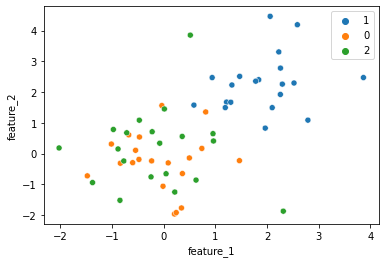

In [7]:
sample_data_onedistinct = make_groups(d_differences=[2,0])
perm_res,post_res = permutational_analysis(data = sample_data_onedistinct,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

We can observe that altough P value of PerMANOVA is still small, its `eta-sqr` lowered.
Post-hoc tests show that one group does not differ significantly from another group.

### Example on data when all groups are the same

,Pval,eta-sqr,F
0,0.526,0.029298,0.860201


,A,B,Pval,bonf,eta-sqr,cohen-d,F,t,dof
0,1,0,0.486,1.458,0.023223,0.308566,0.903461,0.950506,37.955438727738056
1,1,2,0.561,1.683,0.020163,0.289003,0.781945,0.884276,37.448164298817254
2,0,2,0.473,1.419,0.023084,0.308613,0.897924,0.947588,37.7113287512795


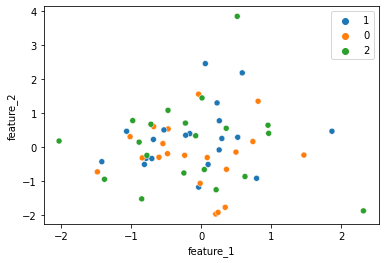

In [8]:
sample_data_allsame = make_groups(d_differences=[0,0])
perm_res,post_res = permutational_analysis(data = sample_data_allsame,
                                           mapping = None,
                                           norm = "column",
                                           by = "row",
                                          )
display(perm_res)
display(post_res)

Here, P-value in PerMANOVA is high, and so are the P-values from post hoc tests,
indicating that groups are not one from another.